Customer Purchase Analysis

Uploading Dataset



In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


Saving Customer Purchase Data.csv to Customer Purchase Data.csv


Reading the uploaded Dataset


In [2]:
df = pd.read_csv('Customer Purchase Data.csv')

# Display first 5 rows
df.head()

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
0,1,56,61350.84215,12372.864450,15,77.685590,6232.122440
1,2,46,53777.18224,11001.604230,10,51.858351,5545.849698
2,3,32,39460.32263,8007.385018,19,98.166371,4054.645293
3,4,60,66672.12210,13526.548370,12,62.530976,6815.544393
4,5,38,44459.08553,9059.304083,9,46.470533,4617.833484


Data Exploration

In [3]:
# Shape of dataset
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Dataset info
df.info()

# Statistical summary
df.describe()


Shape: (1362, 7)
Columns: ['Number', 'Age', 'Income', 'Spending_Score', 'Membership_Years', 'Purchase_Frequency', 'Last_Purchase_Amount']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                1362 non-null   int64  
 1   Age                   1362 non-null   int64  
 2   Income                1362 non-null   float64
 3   Spending_Score        1362 non-null   float64
 4   Membership_Years      1362 non-null   int64  
 5   Purchase_Frequency    1362 non-null   float64
 6   Last_Purchase_Amount  1362 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 74.6 KB


,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,681.500000,43.251836,48317.193784,9765.372547,9.513950,49.551706,4931.689546
std,393.319844,12.533236,12648.638324,2531.133100,5.417624,27.074169,1266.894447
min,1.000000,18.000000,19946.675740,4064.177336,1.000000,4.876052,2057.551913
25%,341.250000,33.000000,38532.229703,7830.921337,5.000000,26.560455,3962.190531
50%,681.500000,43.000000,48758.233625,9850.200389,9.000000,47.729713,4972.893731
75%,1021.750000,54.000000,58579.901010,11810.345793,14.000000,72.135292,5962.991091
max,1362.000000,64.000000,73182.569800,14791.611800,19.000000,99.492184,7519.376995


Check Missing Values & Duplicates

In [4]:
# Missing values
print("Missing values:\n", df.isnull().sum())

# Duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 Number                  0
Age                     0
Income                  0
Spending_Score          0
Membership_Years        0
Purchase_Frequency      0
Last_Purchase_Amount    0
dtype: int64
Duplicate rows: 0


In [5]:
# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Data Visualization (EDA)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


Purchase Amount Distribution

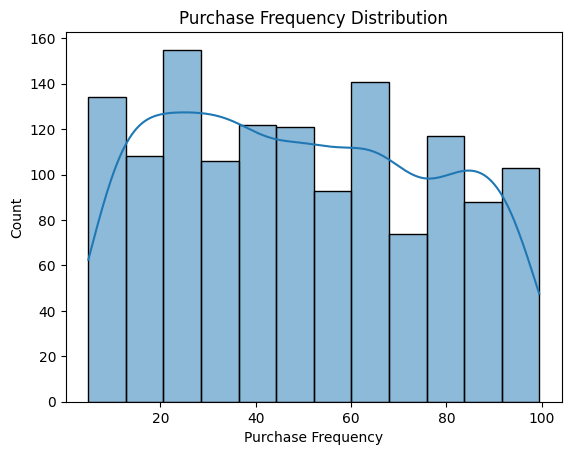

In [7]:
sns.histplot(df['Purchase_Frequency'], kde=True)
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.show()


Gender vs Purchase Frequency


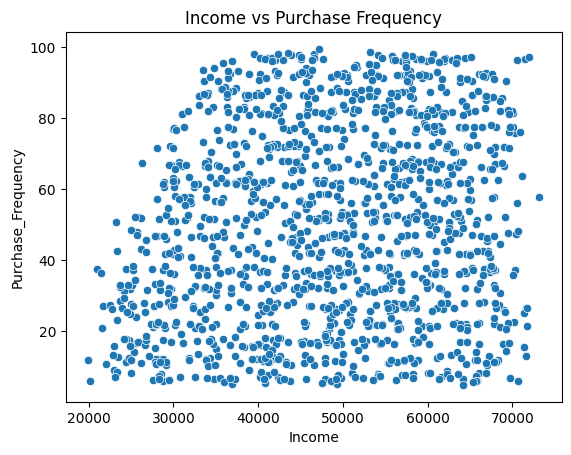

In [8]:
sns.scatterplot(x='Income', y='Purchase_Frequency', data=df)
plt.title("Income vs Purchase Frequency")
plt.show()


Define X (Features) & y (Target)

In [22]:
features = [
    'Age',
    'Income',
    'Spending_Score',
    'Membership_Years',
    'Last_Purchase_Amount'
]

X = df[features]
y = df['Purchase_Frequency']


Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train–Test Split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)




Model Building

In [25]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Prediction & Evaluation

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.9847799602882109
R² Score: 0.9986356314693854


Predict for a New Customer

In [27]:
new_customer = {
    'Age': 40,
    'Income': 52000,
    'Spending_Score': 9500,
    'Membership_Years': 8,
    'Last_Purchase_Amount': 4800
}

new_df = pd.DataFrame([new_customer])

new_scaled = scaler.transform(new_df)
prediction = model.predict(new_scaled)

print(" Predicted Purchase Frequency:", round(prediction[0], 2))

 Predicted Purchase Frequency: 42.29


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation")
print("----------------")
print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 2))


Model Evaluation
----------------
R² Score: 0.999
RMSE: 0.99


Deployment

In [17]:
!pip install gradio


In [28]:
import gradio as gr

def predict_purchase_frequency(age, income, spending_score, membership_years, last_purchase_amount):

    input_df = pd.DataFrame([{
        'Age': age,
        'Income': income,
        'Spending_Score': spending_score,
        'Membership_Years': membership_years,
        'Last_Purchase_Amount': last_purchase_amount
    }])

    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)

    return round(prediction[0], 2)


In [30]:
inputs = [

    gr.Number(label="Age"),
    gr.Number(label="Income"),
    gr.Number(label="Spending Score"),
    gr.Number(label="Membership Years"),
    gr.Number(label="Last Purchase Amount")
]

output = gr.Number(label="Predicted Purchase Frequency")

gr.Interface(
    fn=predict_purchase_frequency,
    inputs=inputs,
    outputs=output,
    title="🛒 Customer Purchase Frequency Predictor",
    description="Predict customer purchase frequency using machine learning"
).launch()


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://62ebaf89a5fbff7086.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://62ebaf89a5fbff7086.gradio.live
